In [287]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from __future__ import print_function
from ipywidgets import interact, interactive, fixed, interact_manual
from IPython.core.display import display, HTML


In [288]:
# import files
death = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv')
confirmed = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv')
recovered = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_recovered_global.csv')
countries = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/web-data/data/cases_country.csv')

In [293]:
# Cleaning the data
countries.columns = map(str.lower, countries.columns)
recovered.columns = map(str.lower, recovered.columns)
death.columns = map(str.lower, death.columns)
confirmed.columns = map(str.lower, confirmed.columns)

In [294]:
confirmed = confirmed.rename(columns = {'province/state': 'state', 'country/region': 'country'})
recovered = recovered.rename(columns = {'province/state': 'state', 'country/region': 'country'})
death = death.rename(columns = {'province/state': 'state', 'country/region': 'country'})
countries = countries.rename(columns={'country_region': 'country'})
                                        

In [295]:
sort_countries = countries.sort_values('confirmed', ascending=False).head(10)


In [296]:
sort_countries

,country,last_update,lat,long_,confirmed,deaths,recovered,active,incident_rate,people_tested,people_hospitalized,mortality_rate,uid,iso3
17,US,2020-05-19 23:32:20,40.000000,-100.000000,1527355.0,91845.0,289392.0,1144189.0,463.584615,NaN,NaN,6.013337,840,USA
13,Russia,2020-05-19 23:32:20,61.524000,105.318800,299941.0,2837.0,76130.0,220974.0,205.531305,NaN,NaN,0.945853,643,RUS
40,Brazil,2020-05-19 23:32:20,-14.235000,-51.925300,271628.0,17971.0,106794.0,146863.0,127.789215,NaN,NaN,6.616034,76,BRA
16,United Kingdom,2020-05-19 23:32:20,55.000000,-3.000000,250138.0,35422.0,1099.0,213617.0,368.467704,NaN,NaN,14.160983,826,GBR
18,Spain,2020-05-19 23:32:20,40.463667,-3.749220,232037.0,27778.0,0.0,204259.0,496.285054,NaN,NaN,11.971367,724,ESP
10,Italy,2020-05-19 23:32:20,41.871900,12.567400,226699.0,32169.0,129401.0,65129.0,374.945660,NaN,NaN,14.190182,380,ITA
6,France,2020-05-19 23:32:20,46.227600,2.213700,180933.0,28025.0,62678.0,90230.0,277.192071,NaN,NaN,15.489159,250,FRA
7,Germany,2020-05-19 23:32:20,51.165691,10.451526,177778.0,8081.0,155681.0,14016.0,212.186237,NaN,NaN,4.545557,276,DEU
175,Turkey,2020-05-19 23:32:20,38.963700,35.243300,151615.0,4199.0,112895.0,34521.0,179.768410,NaN,NaN,2.769515,792,TUR
91,Iran,2020-05-19 23:32:20,32.427908,53.688046,124603.0,7119.0,97173.0,20311.0,148.349350,NaN,NaN,5.713346,364,IRN


In [297]:
confirmed_total = int(countries['confirmed'].sum())
deaths_total = int(countries['deaths'].sum())
recovered_total = int(countries['recovered'].sum())
active_total = int(countries['recovered'].sum())

In [298]:
display(HTML("<div style = 'background-color: #504e4e; padding: 30px '>" +
             "<span style='color: #fff; font-size:30px;'> Confirmed: "  + str(confirmed_total) +"</span>" +
             "<span style='color: red; font-size:30px;margin-left:20px;'> Deaths: " + str(deaths_total) + "</span>"+
             "<span style='color: lightgreen; font-size:30px; margin-left:20px;'> Recovered: " + str(recovered_total) + "</span>"+
             "</div>")
       )

In [299]:
def highlight_col(x):
    r = 'background-color: red'
    p = 'background-color: purple'
    gr = 'background-color: green'
    temp = pd.DataFrame('', index=x.index, columns = x.columns)
    temp.iloc[:, 4] = p
    temp.iloc[:, 5] = r
    temp.iloc[:, 6] = gr
    return temp
    
sort_countries.style.apply(highlight_col, axis=None)

,country,last_update,lat,long_,confirmed,deaths,recovered,active,incident_rate,people_tested,people_hospitalized,mortality_rate,uid,iso3
17,US,2020-05-19 23:32:20,40,-100,1.52736e+06,91845,289392,1.14419e+06,463.585,nan,nan,6.01334,840,USA
13,Russia,2020-05-19 23:32:20,61.524,105.319,299941,2837,76130,220974,205.531,nan,nan,0.945853,643,RUS
40,Brazil,2020-05-19 23:32:20,-14.235,-51.9253,271628,17971,106794,146863,127.789,nan,nan,6.61603,76,BRA
16,United Kingdom,2020-05-19 23:32:20,55,-3,250138,35422,1099,213617,368.468,nan,nan,14.161,826,GBR
18,Spain,2020-05-19 23:32:20,40.4637,-3.74922,232037,27778,0,204259,496.285,nan,nan,11.9714,724,ESP
10,Italy,2020-05-19 23:32:20,41.8719,12.5674,226699,32169,129401,65129,374.946,nan,nan,14.1902,380,ITA
6,France,2020-05-19 23:32:20,46.2276,2.2137,180933,28025,62678,90230,277.192,nan,nan,15.4892,250,FRA
7,Germany,2020-05-19 23:32:20,51.1657,10.4515,177778,8081,155681,14016,212.186,nan,nan,4.54556,276,DEU
175,Turkey,2020-05-19 23:32:20,38.9637,35.2433,151615,4199,112895,34521,179.768,nan,nan,2.76951,792,TUR
91,Iran,2020-05-19 23:32:20,32.4279,53.688,124603,7119,97173,20311,148.349,nan,nan,5.71335,364,IRN


In [300]:
import plotly.express as px

In [301]:
fig = px.scatter(sort_countries.head(10), x='country', y='confirmed', size='confirmed', color='country', hover_name='country', size_max=60)


fig.show()

In [302]:
import plotly.graph_objects as go

def plot_case(country):
    labels = ['confirmed', 'deaths']
    colors = ['blue', 'red']
    mode_size = [6, 8]
    line_size = [4, 5]

    df_list = [confirmed, death]
    fig = go.Figure()
    
    for i, df in enumerate(df_list):
        if country == 'World' or country == 'world':
            x_data = np.array(list(df.iloc[:, 5:].columns))
            y_data = np.sum(np.asarray(df.iloc[:, 5:]), axis = 0)
        
        else:
            x_data = np.array(list(df.iloc[:, 5:].columns))
            y_data = np.sum(np.asarray(df[df['country'] == country].iloc[:, 5:]), axis = 0)
            
        fig.add_trace(go.Scatter(x=x_data, y = y_data, mode='lines+markers',
                                name=labels[i],
                                line=dict(color=colors[i], width=line_size[i]),
                                connectgaps=True,
                                text = "Total " + str(labels[i]) + ": " + str(y_data[-1])
                                ))
        
        fig.update_layout(title_text = "<b>COVID-19 Cases of " + country,
                         xaxis_title='<b>Date',
                         yaxis_title='<b>No. of Confirmed Cases',
                         font=dict(family="Arial, monospace", size = 20),
                         )
        
        fig.show()
plot_case('US')
        

# World Map

### Interactive Map

In [303]:
import folium

In [304]:
world_map = folium.Map(location=[11,0], tiles='OpenStreetMap', zoom_start=2, max_zoom = 6, min_zoom = 2)

for i in range(len(confirmed)):
    folium.Circle(
        location=[confirmed.iloc[i]['lat'], confirmed.iloc[i]['long']],
        fill = True,
        radius = (int((np.log(confirmed.iloc[i, -1]+1.00001))) + 0.2)*50000,
        fill_color = 'blue',
        color = 'red',
        tooltip = "<div style='margin: 0; background-color: aquamarine; color: black;'>"+
                    "<h4 style='text-align:center;font-weight: bold'>"+confirmed.iloc[i]['country'] + "</h4>"
                    "<hr style='margin:10px;color: black;'>"+
                    "<ul style='color: black;;list-style-type:circle;align-item:left;padding-left:20px;padding-right:20px'>"+
                        "<li>Confirmed: "+str(confirmed.iloc[i,-1])+"</li>"+
                        "<li>Deaths:   "+str(death.iloc[i,-1])+"</li>"+
                        "<li>Death Rate: "+ str(np.round(death.iloc[i,-1]/(confirmed.iloc[i,-1]+1.00001)*100,2))+ "</li>"+
                    "</ul></div>",
        ).add_to(world_map)
    
world_map
                

# Worst Hit Countries Plots

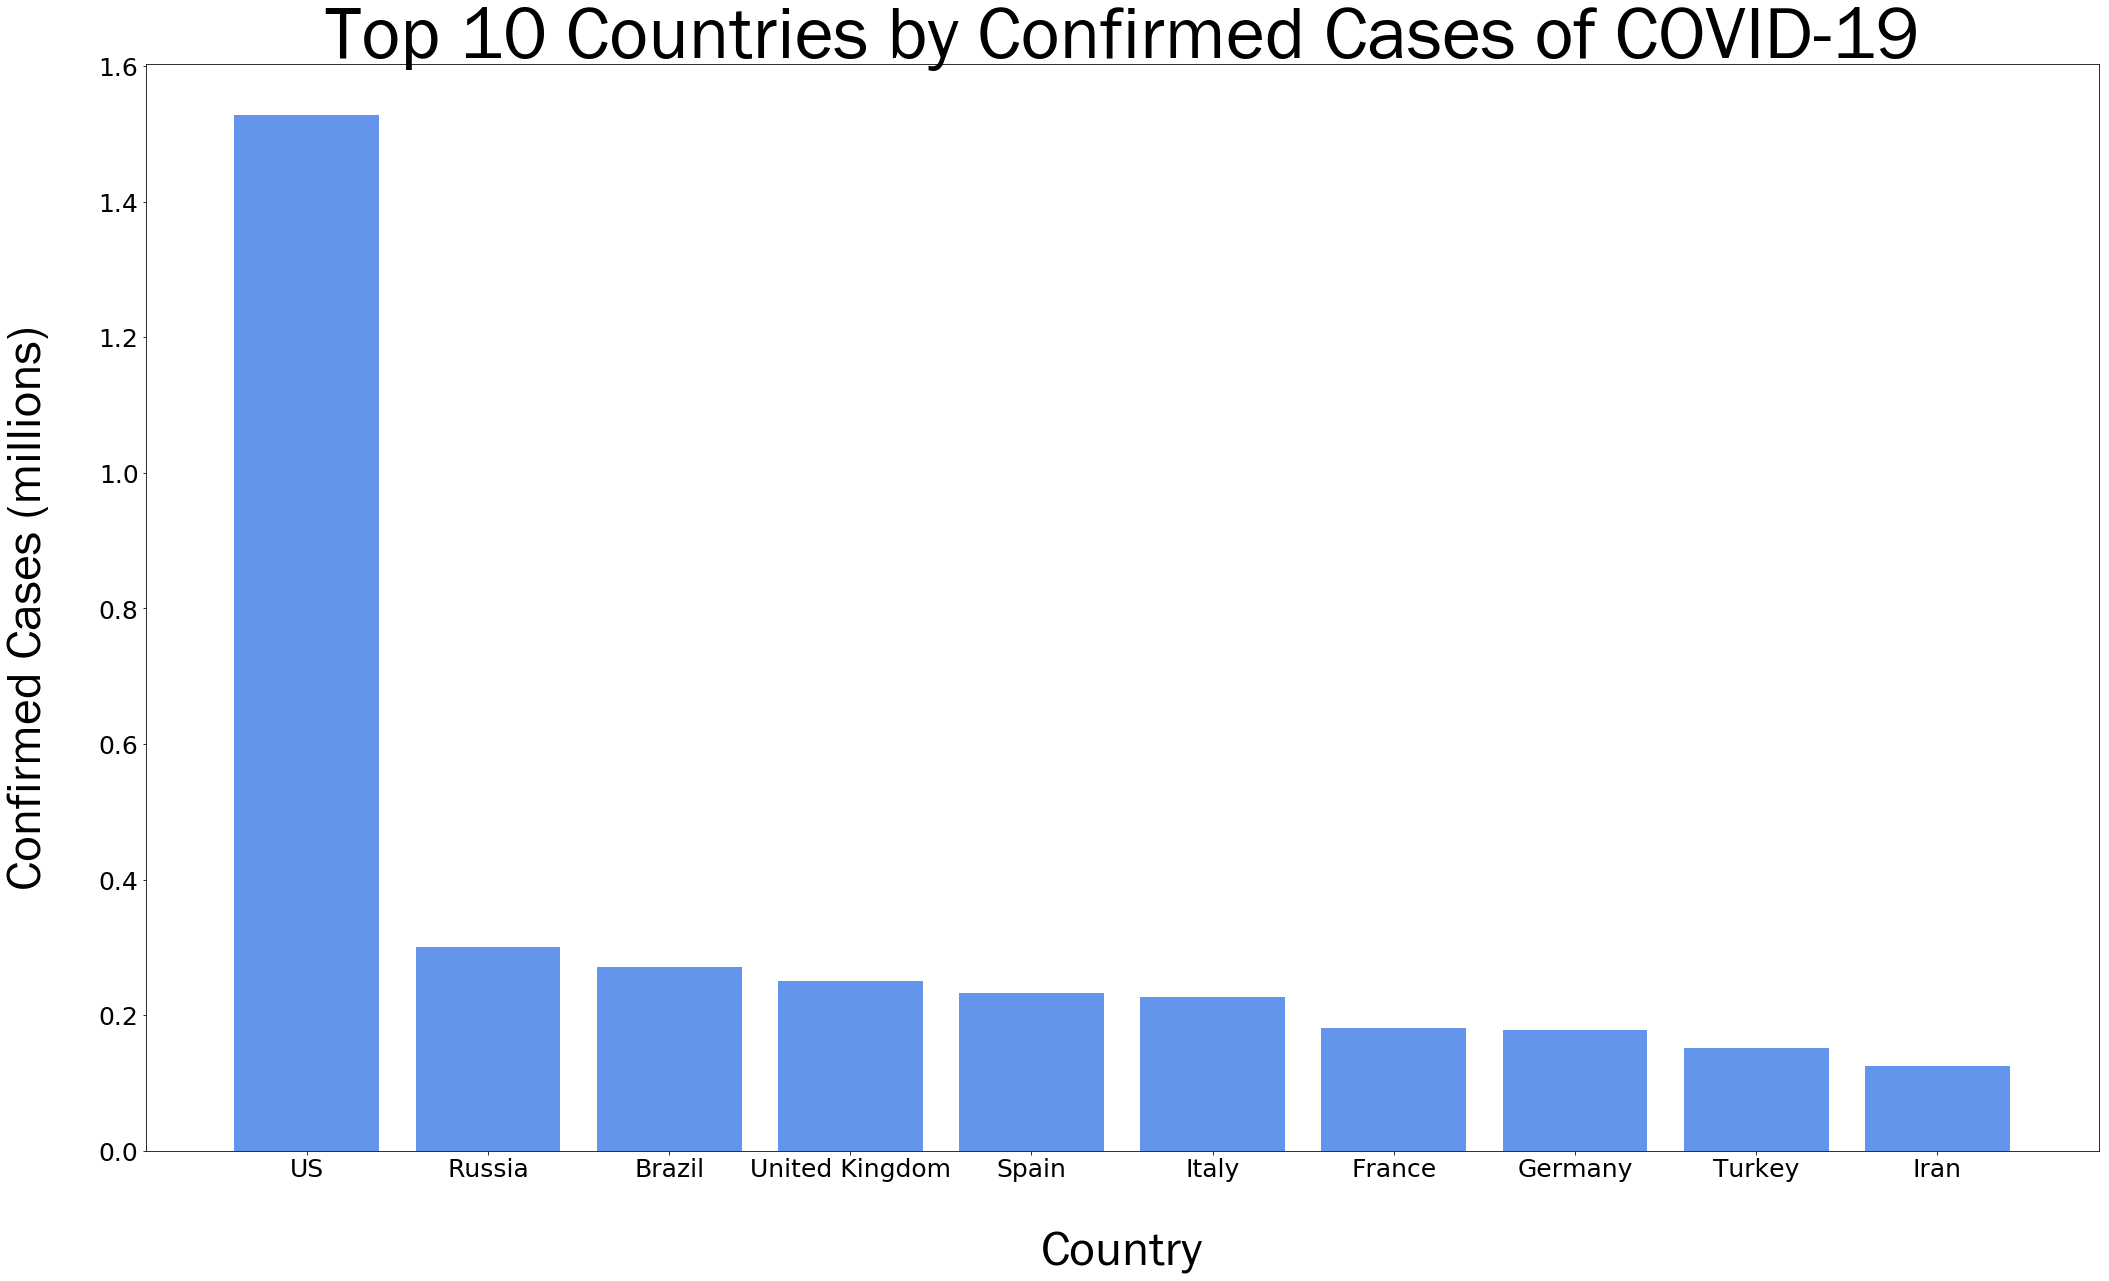

In [307]:
# Matplotlib


sort_countries_confirmed = countries.sort_values('confirmed', ascending=False).head(10)
sort_countries_confirmed['confirmed'] = sort_countries_confirmed['confirmed']/1000000
#sort_countries_confirmed = sort_countries_confirmed[['country', 'deaths']].head(10)
x = sort_countries_confirmed['country'].head(10)
y = sort_countries_confirmed['confirmed'].head(10)


x_pos = [i for i, _ in enumerate(x)]

plt.figure(figsize=(35, 20))
plt.bar(x_pos, y, color='cornflowerblue')

plt.xlabel("...", labelpad=50)
plt.xlabel('Country', fontsize=50, fontweight='bold', fontname="Franklin Gothic Book")

plt.ylabel("...", labelpad=50)
plt.ylabel('Confirmed Cases (millions)', fontsize=50, fontweight='bold', fontname="Franklin Gothic Book")

plt.title("Top 10 Countries by Confirmed Cases of COVID-19", fontweight='bold', fontsize=75,
         fontname="Franklin Gothic Book")

plt.xticks(x_pos, x, fontsize=25)
plt.yticks(fontsize=25)


plt.show()


In [312]:
sort_countries_confirmed[['country', 'confirmed']]

,country,confirmed
17,US,1.527355
13,Russia,0.299941
40,Brazil,0.271628
16,United Kingdom,0.250138
18,Spain,0.232037
10,Italy,0.226699
6,France,0.180933
7,Germany,0.177778
175,Turkey,0.151615
91,Iran,0.124603


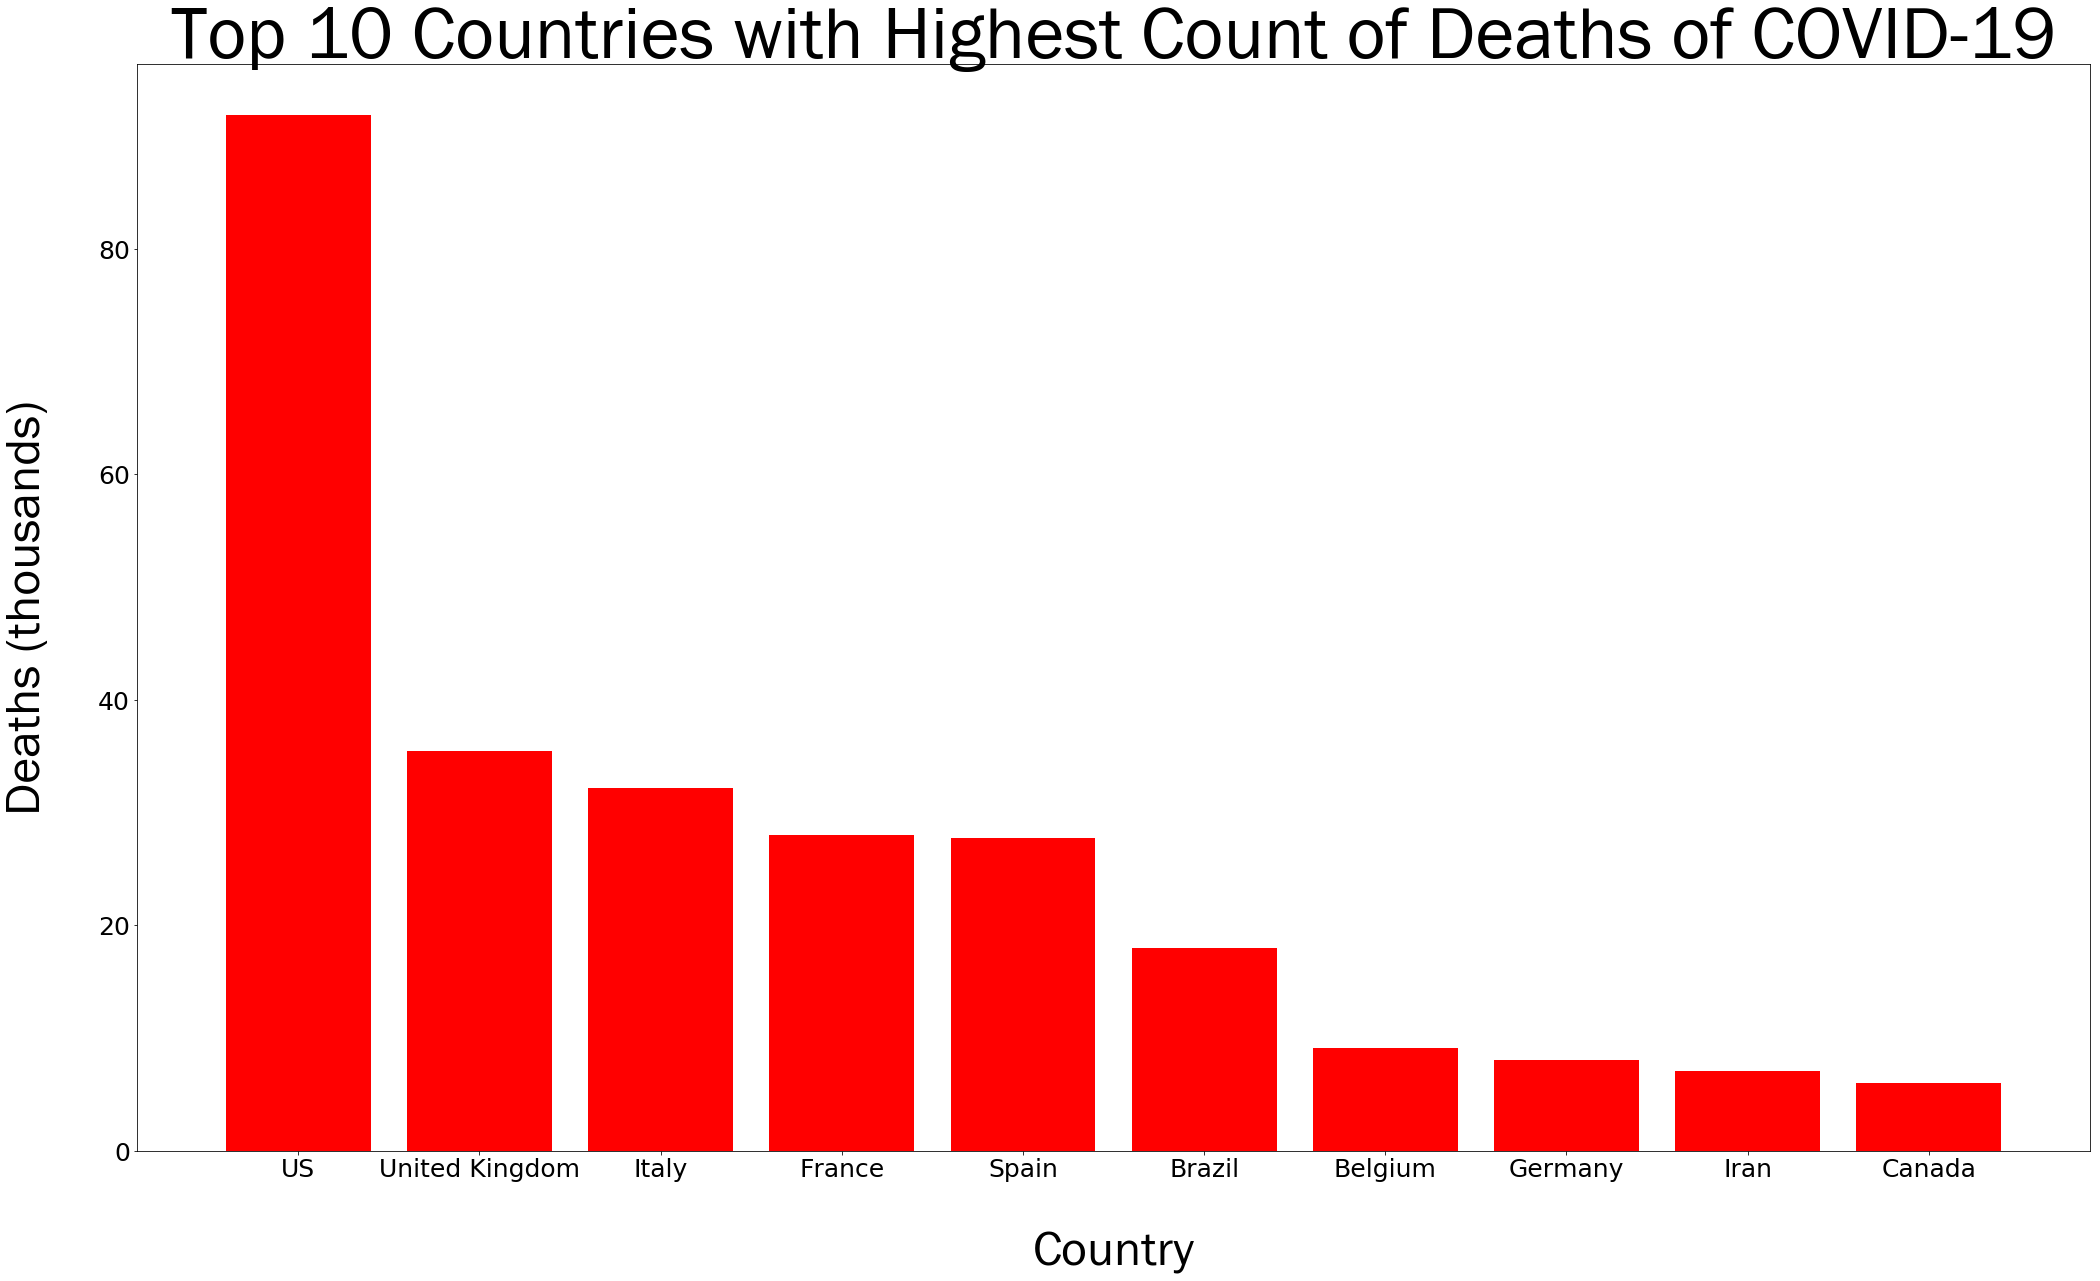

In [308]:
sort_countries_death = countries.sort_values('deaths', ascending=False).head(10)
sort_countries_death['deaths'] = sort_countries_death['deaths']/1000
sort_countries_death[['country', 'deaths']].head(10)
x = sort_countries_death['country'].head(10)
y = sort_countries_death['deaths'].head(10)


x_pos = [i for i, _ in enumerate(x)]

plt.figure(figsize=(35, 20))
plt.bar(x_pos, y, color='red')

plt.xlabel("...", labelpad=50)
plt.xlabel('Country', fontsize=50, fontweight='bold', fontname="Franklin Gothic Book")

plt.ylabel("...", labelpad=50)
plt.ylabel('Deaths (thousands)', fontsize=50, fontweight='bold', fontname="Franklin Gothic Book")

plt.title("Top 10 Countries with Highest Count of Deaths of COVID-19", fontweight='bold', fontsize=75,
         fontname="Franklin Gothic Book")

plt.xticks(x_pos, x, fontsize=25)
plt.yticks(fontsize=25)


plt.show()


In [316]:
sort_countries_death[['country', 'deaths']]

,country,deaths
17,US,91.845
16,United Kingdom,35.422
10,Italy,32.169
6,France,28.025
18,Spain,27.778
40,Brazil,17.971
33,Belgium,9.108
7,Germany,8.081
91,Iran,7.119
2,Canada,6.028


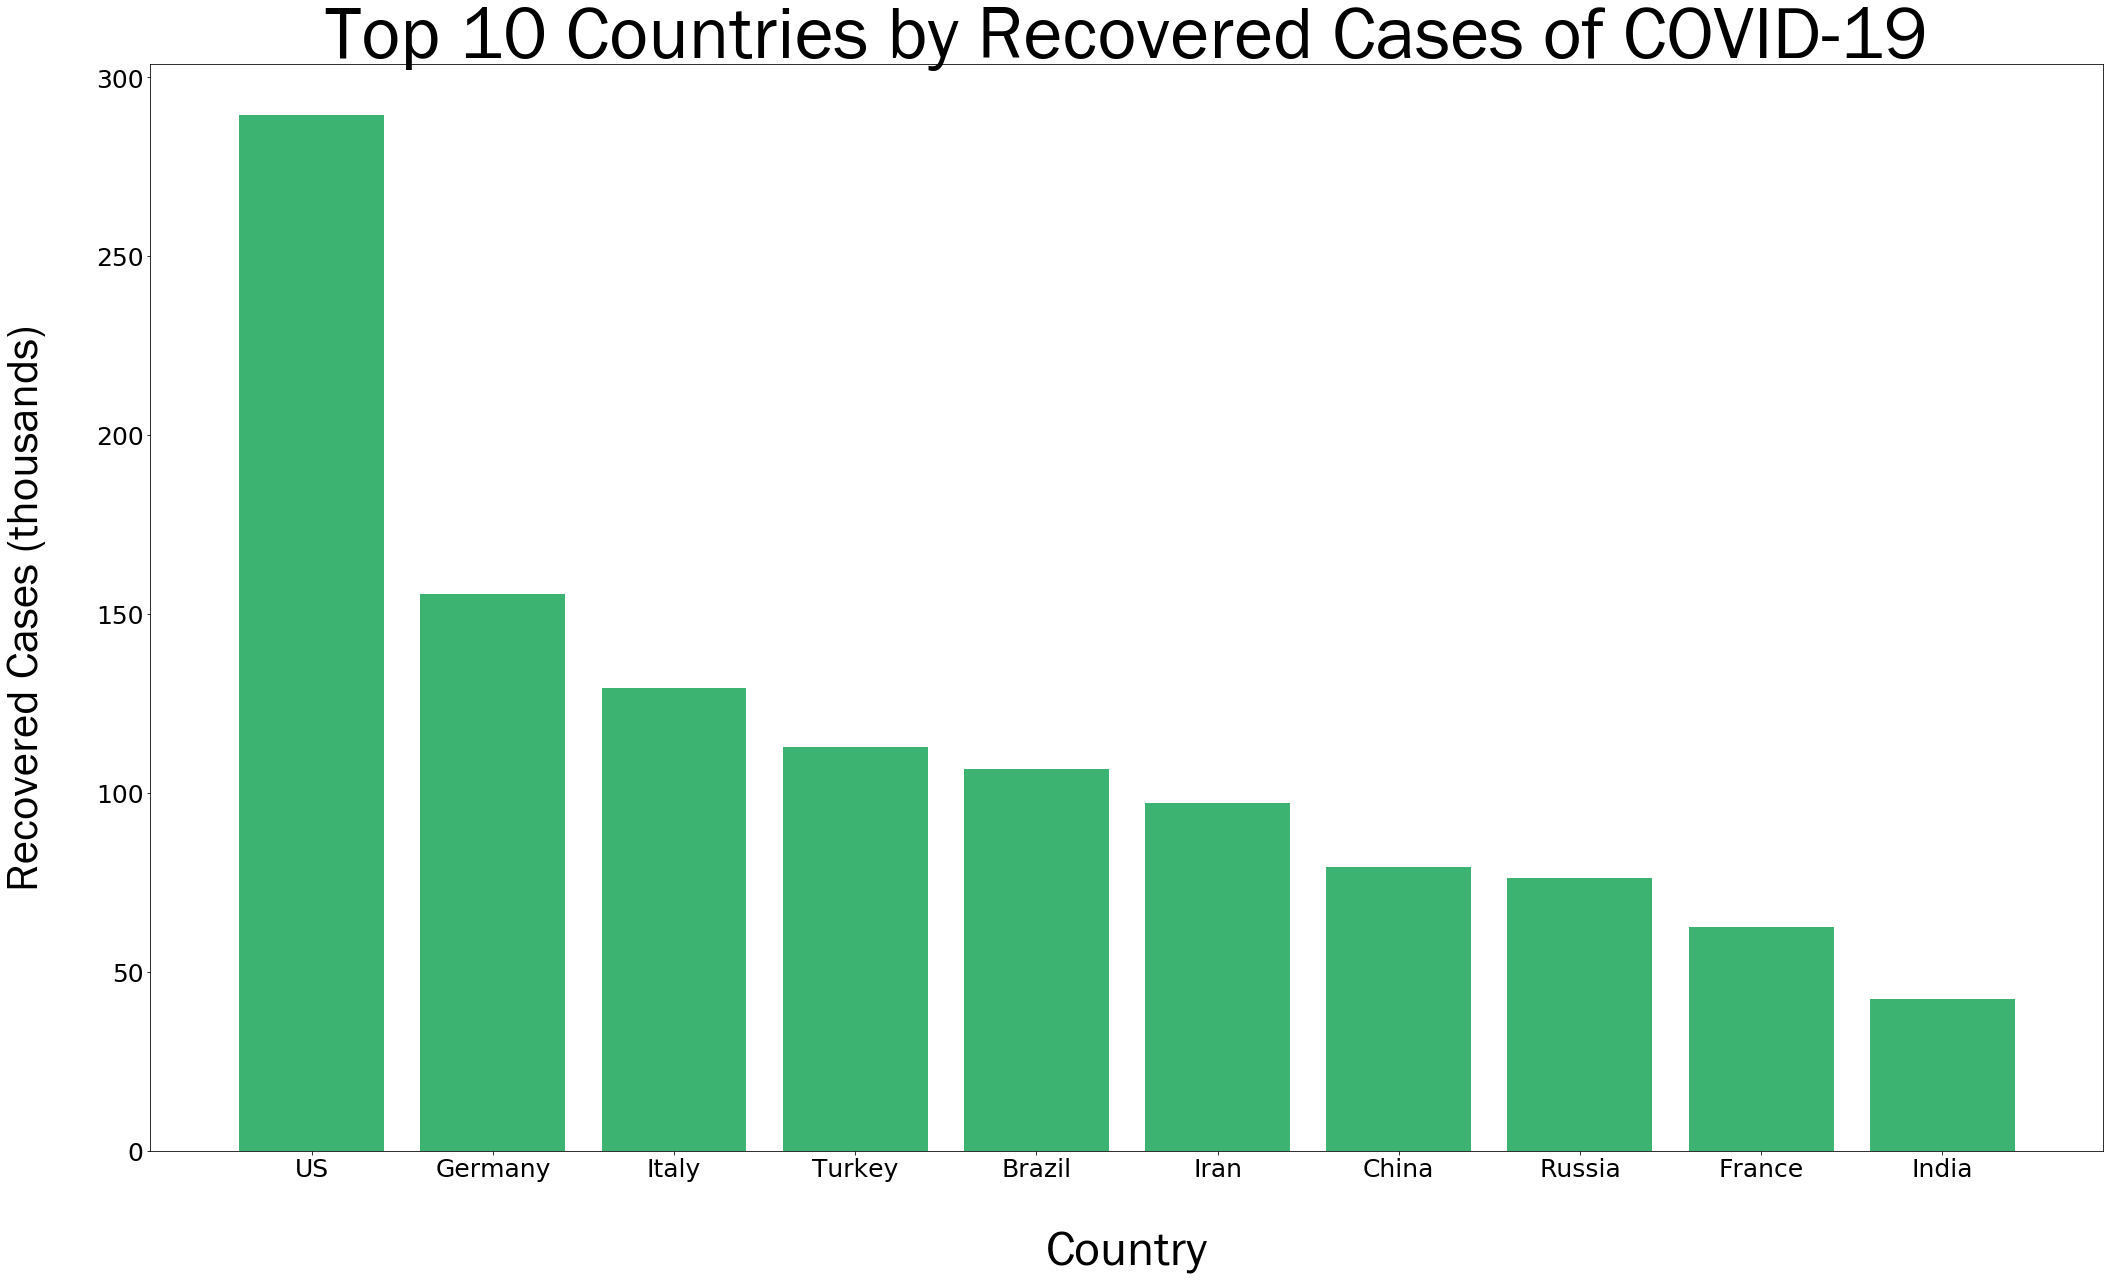

In [309]:

sort_countries_recovered = countries.sort_values('recovered', ascending=False).head(10)
sort_countries_recovered['recovered'] = sort_countries_recovered['recovered']/1000
sort_countries_recovered[['country', 'recovered']].head(10)
x = sort_countries_recovered['country'].head(10)
y = sort_countries_recovered['recovered'].head(10)


x_pos = [i for i, _ in enumerate(x)]

plt.figure(figsize=(35, 20))
plt.bar(x_pos, y, color='mediumseagreen')

plt.xlabel("...", labelpad=50)
plt.xlabel('Country', fontsize=50, fontweight='bold', fontname="Franklin Gothic Book")

plt.ylabel("...", labelpad=50)
plt.ylabel('Recovered Cases (thousands)', fontsize=45, fontweight='bold', fontname="Franklin Gothic Book")

plt.title("Top 10 Countries by Recovered Cases of COVID-19", fontweight='bold', fontsize=75,
         fontname="Franklin Gothic Book")

plt.xticks(x_pos, x, fontsize=25)
plt.yticks(fontsize=25)


plt.show()

In [315]:
sort_countries_recovered[['country', 'recovered']]

,country,recovered
17,US,289.392
7,Germany,155.681
10,Italy,129.401
175,Turkey,112.895
40,Brazil,106.794
91,Iran,97.173
3,China,79.310
13,Russia,76.130
6,France,62.678
89,India,42.309
